<a href="https://colab.research.google.com/github/NaithaniAR/-Play-Store-App-Review-Analysis/blob/main/EDA_PROJECT_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> A. INTRODUCTION </b>

# <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

*  #  Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
*  # Explore and analyze the data to discover key factors responsible for app engagement and success. 

###   **1. Description of App Dataset columns**



1 App : The name of the app

2 Category : The category of the app

3 Rating : The rating of the app in the Play Store

4 Reviews : The number of reviews of the app

5 Size : The size of the app

6 Install : The number of installs of the app

7 Type : The type of the app (Free/Paid)

8 The price of the app (0 if it is Free)

9 Content Rating :The appropiate target audience of the app

10 Genres: The genre of the app

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




### **2. Load Necessary Libraries**


In [2]:
import matplotlib.pyplot as plt          
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
from datetime import datetime

warnings.filterwarnings('ignore')

%matplotlib inline

**Exploring google play store data**



In [3]:
#Reading the csv file 

#df=pd.read_csv('/content/drive/MyDrive/datasets almabetter/Play Store Data.csv')
df=pd.read_csv('/content/drive/MyDrive/Datasets/GG/Play Store Data.csv')

In [4]:
#Top 5 rows of the dataset 

df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [5]:
#last rows of the dataset

df.tail()

App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Education     July 25, 2017                1.48   
10837       Everyone          Education      July 6, 2018                 1.0   
10838       Everyone            Medical  January 20, 2017                 1.0   
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device

In [6]:
#No of rows and column of the dataset

df.shape

(10841, 13)

**there are a total of 10841 rows and 13 columns in this .csv file let's see the column type of our dataset**

In [7]:
#info function will tell you the count of null values and the data type of our columns

df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 **We observe that we have 13 variables in columns of df , with one glance we observe that Data type of certain variables such as price, installs .. etc need to be converted to numeric type.**


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **B. Data   Cleaning**
 “The more data we have, the more likely we are to drown in it.” 
 —Nassim Taleb
 
 “More data beats clever algorithms, but better data beats more data.” 
 — Peter Norvig`

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###**1.Outlier treatment**

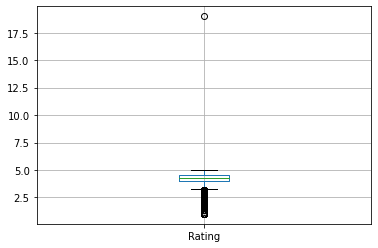

In [10]:
# Making Boxplot for rating 

df.boxplot()  

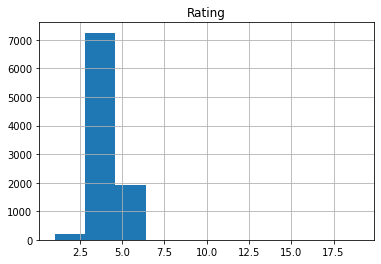

In [11]:
df.hist();

In [12]:
# Print outlier 

df[df.Rating>5] 

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [13]:
#Converting into numpy array 

df.loc[df.App == 'Life Made WI-Fi Touchscreen Photo Frame'].to_numpy()

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [14]:
#Insert a new row with fixed values into the DataFrame


df2= pd.DataFrame(np.insert(df.values, [10472], values=['Life Made WI-Fi Touchscreen Photo Frame', np.NaN ,1.9 ,19.0 ,
                                                        '3.0M','1,000+', 'Free', 0, 'Everyone', np.NaN,
                                                        'February 11, 2018', '1.0.19', '4.0 and up'], axis=0))




In [15]:
# Dropping the 10473 row as it is no longer needed 

df2.drop([10473],inplace=True) 

# Resetting index after dropping column

df.reset_index(drop=True, inplace=True) 

In [16]:
#define column names of DataFrame

df2.columns = df.columns




In [17]:
#Index has beeen reset 

df2.iloc[10470:10475]

App         Category Rating  \
10470                               Jazz Wi-Fi    COMMUNICATION    3.4   
10471                         Xposed Wi-Fi-Pwd  PERSONALIZATION    3.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              NaN    1.9   
10474                  osmino Wi-Fi: free WiFi            TOOLS    4.2   
10475                             Sat-Fi Voice    COMMUNICATION    3.4   

      Reviews  Size     Installs  Type Price Content Rating           Genres  \
10470      49  4.0M      10,000+  Free     0       Everyone    Communication   
10471    1042  404k     100,000+  Free     0       Everyone  Personalization   
10472    19.0  3.0M       1,000+  Free     0       Everyone              NaN   
10474  134203  4.1M  10,000,000+  Free     0       Everyone            Tools   
10475      37   14M       1,000+  Free     0       Everyone    Communication   

            Last Updated Current Ver   Android Ver  
10470  February 10, 2017         0.1    2.3 and up  
10471     August 5, 2014       3.0.0  4.0.3 and up  
10472  February 11, 2018      1.0.19    4.0 and up  
10474     August 7, 2018     6.06.14    4.4 and up  
10475  November 21, 2014     2.2.1.5    2.2 and up

### **2. Duplicate values**


In [18]:
# df has 10841 observation before cleaning. 

df2.shape 

(10841, 13)

In [19]:
#df has 1181 duplicate App's before cleaning. 

df2[df2['App'].duplicated()]  



App       Category Rating Reviews  \
229          Quick PDF Scanner + OCR FREE       BUSINESS    4.2   80805   
236                                   Box       BUSINESS    4.2  159872   
239                    Google My Business       BUSINESS    4.4   70991   
256                   ZOOM Cloud Meetings       BUSINESS    4.4   31614   
261             join.me - Simple Meetings       BUSINESS    4.0    6989   
...                                   ...            ...    ...     ...   
10716                  FarmersOnly Dating         DATING    3.0    1145   
10721  Firefox Focus: The privacy browser  COMMUNICATION    4.4   36981   
10731                         FP Notebook        MEDICAL    4.5     410   
10754      Slickdeals: Coupons & Shopping       SHOPPING    4.5   33599   
10769                                AAFP        MEDICAL    3.8      63   

                     Size     Installs  Type Price Content Rating  \
229    Varies with device   5,000,000+  Free     0       Everyone   
236    Varies with device  10,000,000+  Free     0       Everyone   
239    Varies with device   5,000,000+  Free     0       Everyone   
256                   37M  10,000,000+  Free     0       Everyone   
261    Varies with device   1,000,000+  Free     0       Everyone   
...                   ...          ...   ...   ...            ...   
10716                1.4M     100,000+  Free     0     Mature 17+   
10721                4.0M   1,000,000+  Free     0       Everyone   
10731                 60M      50,000+  Free     0       Everyone   
10754                 12M   1,000,000+  Free     0       Everyone   
10769                 24M      10,000+  Free     0       Everyone   

              Genres       Last Updated         Current Ver  \
229         Business  February 26, 2018  Varies with device   
236         Business      July 31, 2018  Varies with device   
239         Business      July 24, 2018    2.19.0.204537701   
256         Business      July 20, 2018      4.1.28165.0716   
261         Business      July 16, 2018           4.3.0.508   
...              ...                ...                 ...   
10716         Dating  February 25, 2016                 2.2   
10721  Communication       July 6, 2018                 5.2   
10731        Medical     March 24, 2018           2.1.0.372   
10754       Shopping      July 30, 2018                 3.9   
10769        Medical      June 22, 2018               2.3.1   

              Android Ver  
229          4.0.3 and up  
236    Varies with device  
239            4.4 and up  
256            4.0 and up  
261            4.4 and up  
...                   ...  
10716          4.0 and up  
10721          5.0 and up  
10731          4.4 and up  
10754          4.4 and up  
10769          5.0 and up  

[1181 rows x 13 columns]

In [20]:
#Changing Last Updated to date time 


df2['Last Updated']=pd.to_datetime(df2['Last Updated'])
 
#Sorting values by last update before dropping duplicate values 


df2=df2.sort_values(by='Last Updated',ascending=False)

In [21]:
#Dropping duplicate values

before = len(df.index)                                                                   #Length of original Dataframe 
print('Total entries with duplicates were '+ (str(before)))
ddf=df2.drop_duplicates(subset=['App'], keep='first', inplace=False, ignore_index=True)   #Drop duplicates with a value in a specific column.
after = len(ddf.index)                                                                   #Length of duplicated Dataframe 
print('Total entries after duplicates were dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')

Total entries with duplicates were 10841
Total entries after duplicates were dropped are 9660
Total 1181 entries were dropped.


In [22]:
 # we have successfully removed duplicate values and the new shape of 9660 rows × 13 columns is realised. 

 ddf

App            Category Rating  \
0                            Lalafo Pulsuz Elanlar            SHOPPING    4.4   
1     Video Downloader For FB: Save FB Videos 2018               TOOLS    4.3   
2                          Shoot Hunter-Gun Killer                GAME    4.3   
3                                       BankNordik             FINANCE    3.9   
4                                  Fast Tract Diet  HEALTH_AND_FITNESS    4.4   
...                                            ...                 ...    ...   
9655                                   Freecell CY                GAME    4.0   
9656                         DEER HUNTER CHALLENGE                GAME    3.7   
9657                      FD Shift Calendar Widget               TOOLS    4.1   
9658                      CJ Poker Odds Calculator                GAME    4.1   
9659                     FML F*ck my life + widget              FAMILY    4.2   

     Reviews                Size     Installs  Type  Price Content Rating  \
0      61392  Varies with device   1,000,000+  Free      0       Everyone   
1        434                3.6M      50,000+  Free      0       Everyone   
2     320334                 27M  50,000,000+  Free      0           Teen   
3         28                 15M       5,000+  Free      0       Everyone   
4         35                2.4M       1,000+  Paid  $7.99       Everyone   
...      ...                 ...          ...   ...    ...            ...   
9655     387                1.1M      50,000+  Free      0       Everyone   
9656   38767                4.1M   5,000,000+  Free      0   Everyone 10+   
9657     981                 73k     100,000+  Free      0       Everyone   
9658     207                116k      50,000+  Free      0       Everyone   
9659    1415                209k     100,000+  Free      0       Everyone   

                Genres Last Updated         Current Ver         Android Ver  
0             Shopping   2018-08-08  Varies with device  Varies with device  
1                Tools   2018-08-08               1.1.9        4.0.3 and up  
2               Action   2018-08-08               1.1.2          4.1 and up  
3              Finance   2018-08-08               7.3.2          5.0 and up  
4     Health & Fitness   2018-08-08               1.9.3          4.2 and up  
...                ...          ...                 ...                 ...  
9655              Card   2011-04-16               1.3.3          1.6 and up  
9656            Action   2011-04-11               1.4.3          2.0 and up  
9657             Tools   2011-03-16               1.2.4          1.6 and up  
9658              Card   2011-01-30                 1.2          1.6 and up  
9659     Entertainment   2010-05-21                 3.1          1.5 and up  

[9660 rows x 13 columns]

In [23]:
#Checking for duplicate values 


duplicate =ddf.groupby(['App']).agg({'Category': 'count'}).reset_index()  
duplicate = duplicate.sort_values(by=['Category'], ascending=False)
duplicate.head(20)

App  Category
0                 "i DT" Fútbol. Todos Somos Técnicos.         1
6434                                    My Talking Tom         1
6436                       My Teacher - Classroom Play         1
6437                                         My Telcel         1
6438                                          My Tele2         1
6439  My Theme Park: RollerCoaster & Water Park Tycoon         1
6440                                          My Truck         1
6441                              My Virtual Boyfriend         1
6442                                     My Vodacom SA         1
6443                                  My Vodafone (GR)         1
6444                    My Wild Pet: Online Animal Sim         1
6445                       My baby Game (Balloon POP!)         1
6446                                     My baby Phone         1
6447                                     My baby Piano         1
6448                                  My baby firework         1
6449                      My baby firework (Remove ad)         1
6450                                           My love         1
6435                             My Tamagotchi Forever         1
6433                                    My Talking Pet         1
6452                           MyASUS - Service Center         1

### **3. Rating**

In [24]:
ddf['Rating'].head()

0    4.4
1    4.3
2    4.3
3    3.9
4    4.4
Name: Rating, dtype: object

Since rating can range from 1 to 5 we can observe the presence of an outlier.

In [25]:
# Print outlier 

ddf[ddf.Rating>5] 

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []



We observe the data frame [9300] has shifted values.

In [26]:
#Converting into numpy array 

ddf.loc[ddf.App == 'Life Made WI-Fi Touchscreen Photo Frame'].to_numpy()

array([['Life Made WI-Fi Touchscreen Photo Frame', nan, 1.9, 19.0,
        '3.0M', '1,000+', 'Free', 0, 'Everyone', nan,
        Timestamp('2018-02-11 00:00:00'), '1.0.19', '4.0 and up']],
      dtype=object)

In [27]:
#Insert a new row with fixed values into the DataFrame


ddf= pd.DataFrame(np.insert(ddf.values, [9300], values=['Life Made WI-Fi Touchscreen Photo Frame', np.NaN ,1.9 ,19.0 ,
                                                        '3.0M','1,000+', 'Free', 0, 'Everyone', np.NaN,
                                                        'February 11, 2018', '1.0.19', '4.0 and up'], axis=0))






In [28]:
# Dropping the 9301 row as it is no longer needed 

ddf.drop([9301],inplace=True) 

# Resetting index after dropping column

ddf.reset_index(drop=True, inplace=True) 

In [29]:
#define column names of DataFrame

ddf.columns = df.columns

# Convert col to numeric
ddf['Reviews'] = pd.to_numeric(ddf['Reviews']) 

In [30]:
#Index has beeen reset 

ddf.iloc[9298:9303]

App         Category Rating  \
9298              Florida HSMV Driver License           FAMILY    3.9   
9299                         Homework Planner        EDUCATION    4.0   
9300  Life Made WI-Fi Touchscreen Photo Frame              NaN    1.9   
9301                        AC Troubleshooter            TOOLS    4.7   
9302               GLASS GO Launcher EX Theme  PERSONALIZATION    4.2   

      Reviews  Size    Installs  Type Price Content Rating           Genres  \
9298     14.0   11M      1,000+  Free     0       Everyone        Education   
9299   2525.0  1.2M    100,000+  Free     0       Everyone        Education   
9300     19.0  3.0M      1,000+  Free     0       Everyone              NaN   
9301    147.0  4.2M     10,000+  Free     0       Everyone            Tools   
9302  18280.0  6.0M  1,000,000+  Free     0       Everyone  Personalization   

             Last Updated Current Ver Android Ver  
9298  2015-01-13 00:00:00         1.3  4.0 and up  
9299  2015-01-11 00:00:00      15.9.4  4.0 and up  
9300    February 11, 2018      1.0.19  4.0 and up  
9301  2015-01-08 00:00:00         1.3  3.0 and up  
9302  2015-01-08 00:00:00        1.28  1.6 and up

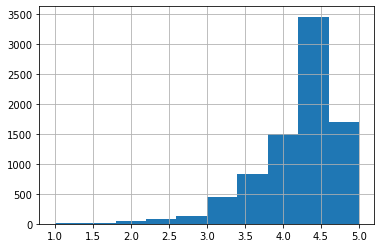

In [31]:
# Plotting histogram

ddf['Rating'].hist(); 


After treating the outlier we observe the rating values range from 1 to 5 

In [32]:
# Printing Total null values in rating  

ddf['Rating'].isnull().sum() 

1463

We observe there are 1465 null values in ratings column 

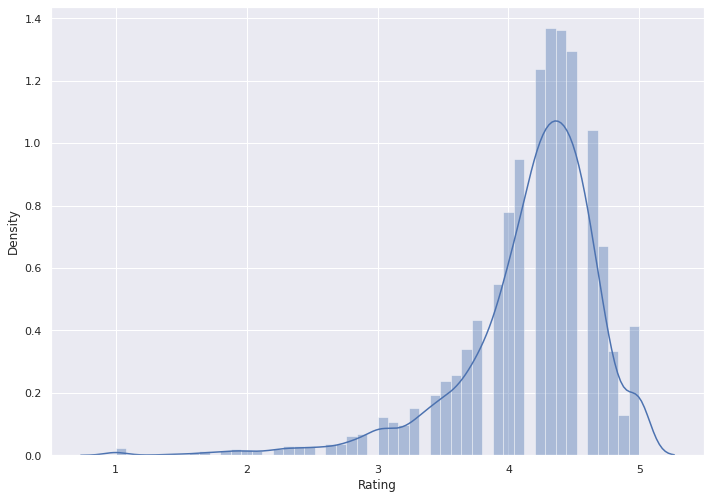

In [33]:
#Plot Before we treat null values. 

sns.set(rc={'figure.figsize':(11.7,8.25)}) 
ax = sns.distplot(ddf['Rating'])

From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8


In [34]:
#Imp

impute_median=ddf['Rating'].median()                     
ddf['Rating']=ddf['Rating'].fillna(impute_median)       

You may note that the data is skewed and is not a catagorical data, hence it is not recommended to use the mean/mode for replacing the missing values
Using mean/mode values for replacing missing values may not create a great model and hence it gets ruled out. 



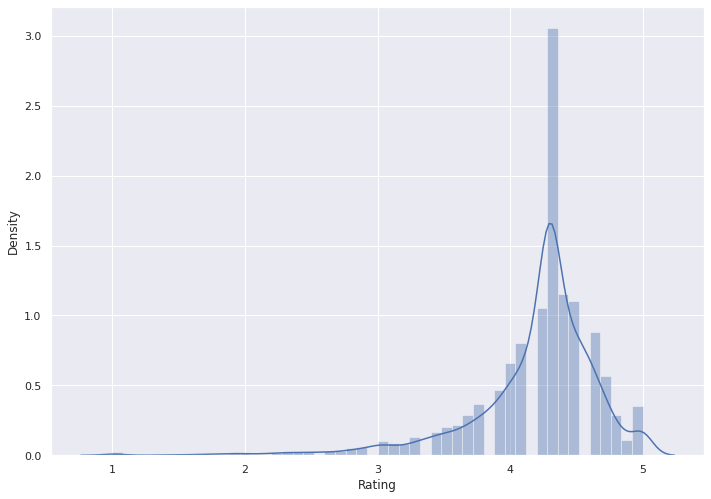

In [35]:
#Plot after we fill NaN values

sns.set(rc={'figure.figsize':(11.7,8.25)}) 
ax = sns.distplot(ddf['Rating'])


we can observe little to no devation from the original plot. 

### **4. Install & Price**

In [36]:
# Printing unique values price
ddf[('Installs')].unique() 

array(['1,000,000+', '50,000+', '50,000,000+', '5,000+', '1,000+',
       '10,000,000+', '10+', '5,000,000+', '500,000+', '50+', '100,000+',
       '100,000,000+', '100+', '10,000+', '0+', '1,000,000,000+',
       '500,000,000+', '500+', '5+', '1+', '0'], dtype=object)

We observe that there are unwanted characters in the dataset and the data type of the data is of object type.

In [37]:
#Printing unique values for price

ddf[('Price')].unique()  

array(['0', '$7.99', '$0.99', '$3.99', '$1.49', '$12.99', '$1.99',
       '$2.99', '$2.49', '$3.49', '$4.49', '$11.99', '$5.99', '$4.77',
       '$14.99', '$8.99', '$4.99', '$1.59', '$6.99', '$299.99', '$399.99',
       '$9.00', '$9.99', '$28.99', '$19.99', '$394.99', '$29.99', '$2.90',
       '$379.99', '$74.99', '$389.99', '$1.00', '$79.99', '$25.99',
       '$1.20', '$24.99', '$3.90', '$7.49', '$400.00', '$2.00', '$10.99',
       '$5.49', '$39.99', '$18.99', '$2.95', '$2.50', 0, '$15.99',
       '$30.99', '$3.02', '$1.76', '$154.99', '$19.40', '$3.95', '$17.99',
       '$33.99', '$10.00', '$109.99', '$3.28', '$13.99', '$37.99',
       '$14.00', '$2.59', '$8.49', '$89.99', '$16.99', '$19.90', '$46.99',
       '$4.60', '$3.61', '$4.59', '$3.04', '$3.08', '$4.29', '$1.61',
       '$1.75', '$6.49', '$1.70', '$200.00', '$15.46', '$4.80', '$1.97',
       '$1.50', '$1.96', '$2.60', '$4.84', '$5.00', '$1.29', '$4.85',
       '$2.56', '$3.88', '$1.04', '$1.26'], dtype=object)

In [38]:
# List of Symbols names to clean

chars_to_remove = ['+', ',' , '$' ]
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        ddf[col] = ddf[col].astype(str).str.replace(char, '')
        

Price

In [39]:
 # Convert col to numeric
ddf['Price'] = pd.to_numeric(ddf['Price']) 


In [40]:
ddf[('Price')].unique()

array([  0.  ,   7.99,   0.99,   3.99,   1.49,  12.99,   1.99,   2.99,
         2.49,   3.49,   4.49,  11.99,   5.99,   4.77,  14.99,   8.99,
         4.99,   1.59,   6.99, 299.99, 399.99,   9.  ,   9.99,  28.99,
        19.99, 394.99,  29.99,   2.9 , 379.99,  74.99, 389.99,   1.  ,
        79.99,  25.99,   1.2 ,  24.99,   3.9 ,   7.49, 400.  ,   2.  ,
        10.99,   5.49,  39.99,  18.99,   2.95,   2.5 ,  15.99,  30.99,
         3.02,   1.76, 154.99,  19.4 ,   3.95,  17.99,  33.99,  10.  ,
       109.99,   3.28,  13.99,  37.99,  14.  ,   2.59,   8.49,  89.99,
        16.99,  19.9 ,  46.99,   4.6 ,   3.61,   4.59,   3.04,   3.08,
         4.29,   1.61,   1.75,   6.49,   1.7 , 200.  ,  15.46,   4.8 ,
         1.97,   1.5 ,   1.96,   2.6 ,   4.84,   5.  ,   1.29,   4.85,
         2.56,   3.88,   1.04,   1.26])

Unwanted characters such as '$' has been removed.

In [41]:
# checking for null values

ddf['Price'].isnull().sum() 

0

In [42]:
# We can observe that the data type is changed to float type 

ddf[('Price')].describe() 

count    9660.000000
mean        1.097117
std        16.850750
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

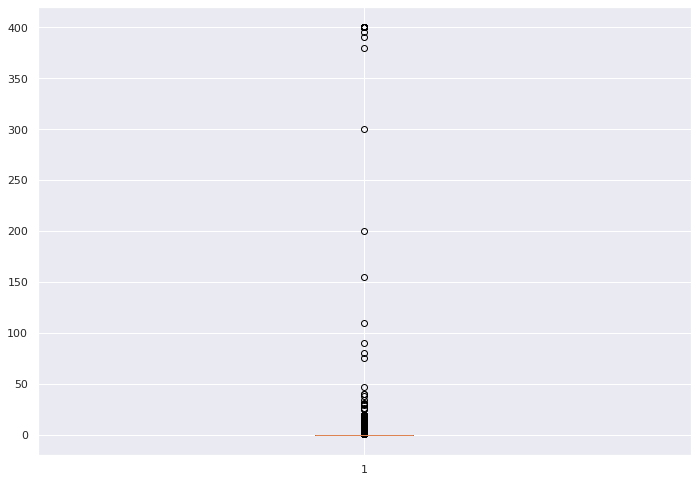

In [43]:
#Create a box plot for the price column

plt.boxplot(ddf.Price)
plt.show()

In [44]:
print(ddf[ddf.Price>30].shape)  


(29, 13)




*   We observe that there are 29 apps which are outliers for price app, since the majority of apps lie between 0-30$.
*   Scope of this project is limited to analysis we will leave it as is.




In [45]:
# Checking data for logical inconsistency, there are none present 

ddf[(ddf.Type == "Free") & (ddf.Price > 0)] 

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

Our Data is Logically Consistant

In [46]:
# Storing data sets for Future use: 
ddf_free=ddf[ddf.Price<=0.0];
ddf_paid=ddf[ddf.Price>=0.0];
ddf_Most_expensive = ddf[ddf.Price>=30.0];

**********

Installs

In [47]:
 # Convert col to numeric Data type

 ddf['Installs'] = pd.to_numeric(ddf['Installs']) 
 

In [48]:
# Finding value counts of installs 

ddf[('Installs')].value_counts()

1000000       1418
100000        1112
10000         1031
10000000       936
1000           889
100            709
5000000        607
500000         503
50000          469
5000           468
10             385
500            328
50000000       204
50             204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

Data type has been changed Successfully  

In [49]:
#Checking for null values of null values 

ddf['Installs'].isnull().sum() 


0

### **5. Reviews**

In [50]:
# We observe that reviews data type is object, for convinience during EDA we will convert it to int data type. 

ddf['Reviews'].describe() 

count    9.660000e+03
mean     2.167087e+05
std      1.830921e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.943825e+04
max      7.815831e+07
Name: Reviews, dtype: float64

We need to change the data type of reviews.

In [51]:
ddf = ddf.astype({'Reviews':'int'})

In [52]:
ddf['Reviews'].describe()

count    9.660000e+03
mean     2.167087e+05
std      1.830921e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.943825e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Data type has been changed Successfully

In [53]:
# there are no null values in Reviews 

ddf['Reviews'].isnull().sum() 

0

In [54]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

Checking for logical inconsistency

In [55]:
print('Number of app with fake reviews:', ddf[(ddf.Reviews > ddf.Installs)].shape);     
print('\n')
print('Shape of data before removing apps with fake reviews:', ddf.shape);
print('\n')
ddf[(ddf.Reviews > ddf.Installs)]



Number of app with fake reviews: (11, 13)


Shape of data before removing apps with fake reviews: (9660, 13)




App         Category  Rating  Reviews  \
735                 KBA-EZ Health Guide          MEDICAL     5.0        4   
1348      Alarmy (Sleep If U Can) - Pro        LIFESTYLE     4.8    10249   
1948                   Brick Breaker BR             GAME     5.0        7   
2017                            DN Blog           SOCIAL     5.0       20   
2425  RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템           FAMILY     4.3        4   
7182            AX Watch for WatchMaker  PERSONALIZATION     4.3        2   
7669                          DZ Puzzle           FAMILY     4.3       14   
7811               Trovami se ci riesci             GAME     5.0       11   
7840                            Mu.F.O.             GAME     5.0        2   
7930                           Ra Ga Ba             GAME     5.0        2   
9225                         Sam.BN Pro            TOOLS     4.3       11   

                    Size  Installs  Type  Price Content Rating  \
735                  25M         1  Free   0.00       Everyone   
1348  Varies with device     10000  Paid   2.49       Everyone   
1948                 19M         5  Free   0.00       Everyone   
2017                4.2M        10  Free   0.00           Teen   
2425                 64M         1  Free   0.00       Everyone   
7182                238k         1  Paid   0.99       Everyone   
7669                 47M        10  Paid   0.99       Everyone   
7811                6.1M        10  Free   0.00       Everyone   
7840                 16M         1  Paid   0.99       Everyone   
7930                 20M         1  Paid   1.49       Everyone   
9225                2.0M        10  Paid   0.99       Everyone   

               Genres         Last Updated         Current Ver  \
735           Medical  2018-08-02 00:00:00              1.0.72   
1348        Lifestyle  2018-07-30 00:00:00  Varies with device   
1948           Arcade  2018-07-23 00:00:00                 1.0   
2017           Social  2018-07-23 00:00:00                 1.0   
2425        Education  2018-07-17 00:00:00               1.0.1   
7182  Personalization  2017-08-18 00:00:00                 1.0   
7669           Puzzle  2017-04-22 00:00:00                 1.2   
7811           Arcade  2017-03-11 00:00:00                 0.1   
7840           Arcade  2017-03-03 00:00:00                 1.0   
7930           Arcade  2017-02-08 00:00:00               1.0.4   
9225            Tools  2015-03-27 00:00:00               1.0.0   

             Android Ver  
735         4.0.3 and up  
1348  Varies with device  
1948          4.1 and up  
2017          4.0 and up  
2425          4.4 and up  
7182          2.3 and up  
7669          2.3 and up  
7811          2.3 and up  
7840          2.3 and up  
7930          2.3 and up  
9225        4.0.3 and up

We observe logical inconsistency in our data, as the number reviews cannot be greater than number of installs. Hence, we need to remove them. 

In [56]:
ddf = ddf[ddf.Reviews <= ddf.Installs]         
print(ddf.shape) 
ddf

(9649, 13)


App            Category  \
0                            Lalafo Pulsuz Elanlar            SHOPPING   
1     Video Downloader For FB: Save FB Videos 2018               TOOLS   
2                          Shoot Hunter-Gun Killer                GAME   
3                                       BankNordik             FINANCE   
4                                  Fast Tract Diet  HEALTH_AND_FITNESS   
...                                            ...                 ...   
9655                                   Freecell CY                GAME   
9656                         DEER HUNTER CHALLENGE                GAME   
9657                      FD Shift Calendar Widget               TOOLS   
9658                      CJ Poker Odds Calculator                GAME   
9659                     FML F*ck my life + widget              FAMILY   

      Rating  Reviews                Size  Installs  Type  Price  \
0        4.4    61392  Varies with device   1000000  Free   0.00   
1        4.3      434                3.6M     50000  Free   0.00   
2        4.3   320334                 27M  50000000  Free   0.00   
3        3.9       28                 15M      5000  Free   0.00   
4        4.4       35                2.4M      1000  Paid   7.99   
...      ...      ...                 ...       ...   ...    ...   
9655     4.0      387                1.1M     50000  Free   0.00   
9656     3.7    38767                4.1M   5000000  Free   0.00   
9657     4.1      981                 73k    100000  Free   0.00   
9658     4.1      207                116k     50000  Free   0.00   
9659     4.2     1415                209k    100000  Free   0.00   

     Content Rating            Genres         Last Updated  \
0          Everyone          Shopping  2018-08-08 00:00:00   
1          Everyone             Tools  2018-08-08 00:00:00   
2              Teen            Action  2018-08-08 00:00:00   
3          Everyone           Finance  2018-08-08 00:00:00   
4          Everyone  Health & Fitness  2018-08-08 00:00:00   
...             ...               ...                  ...   
9655       Everyone              Card  2011-04-16 00:00:00   
9656   Everyone 10+            Action  2011-04-11 00:00:00   
9657       Everyone             Tools  2011-03-16 00:00:00   
9658       Everyone              Card  2011-01-30 00:00:00   
9659       Everyone     Entertainment  2010-05-21 00:00:00   

             Current Ver         Android Ver  
0     Varies with device  Varies with device  
1                  1.1.9        4.0.3 and up  
2                  1.1.2          4.1 and up  
3                  7.3.2          5.0 and up  
4                  1.9.3          4.2 and up  
...                  ...                 ...  
9655               1.3.3          1.6 and up  
9656               1.4.3          2.0 and up  
9657               1.2.4          1.6 and up  
9658                 1.2          1.6 and up  
9659                 3.1          1.5 and up  

[9649 rows x 13 columns]

observation with logical inconsistency have been removed. 
**********

### **6. Current Var**

In [57]:
ddf['Current Ver'].head()

0    Varies with device
1                 1.1.9
2                 1.1.2
3                 7.3.2
4                 1.9.3
Name: Current Ver, dtype: object

In [58]:
ddf[ddf['Current Ver'].isnull()]  # checking for null values, we observe 7 null values 

App             Category  Rating  Reviews  \
4104  Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2       55   
5067                      Dots puzzle               FAMILY     4.0      179   
7593           Virtual DJ Sound Mixer                TOOLS     4.2     4010   
7719                  Calculate My IQ               FAMILY     4.3       44   
7985                   La Fe de Jesus  BOOKS_AND_REFERENCE     4.3        8   
8235                        BT Master               FAMILY     4.3        0   
8544                           UFO-CQ                TOOLS     4.3        1   
9613             Market Update Helper   LIBRARIES_AND_DEMO     4.1    20145   

      Size  Installs  Type  Price Content Rating             Genres  \
4104  2.7M      5000  Free   0.00       Everyone       Art & Design   
5067   14M     50000  Paid   0.99       Everyone             Puzzle   
7593  8.7M    500000  Free   0.00       Everyone              Tools   
7719  7.2M     10000  Free   0.00       Everyone      Entertainment   
7985  658k      1000  Free   0.00       Everyone  Books & Reference   
8235  222k       100  Free   0.00       Everyone          Education   
8544  237k        10  Paid   0.99       Everyone              Tools   
9613   11k   1000000  Free   0.00       Everyone   Libraries & Demo   

             Last Updated Current Ver Android Ver  
4104  2018-06-06 00:00:00         NaN  4.2 and up  
5067  2018-04-18 00:00:00         NaN  4.0 and up  
7593  2017-05-10 00:00:00         NaN  4.0 and up  
7719  2017-04-03 00:00:00         NaN  2.3 and up  
7985  2017-01-31 00:00:00         NaN  3.0 and up  
8235  2016-11-06 00:00:00         NaN  1.6 and up  
8544  2016-07-04 00:00:00         NaN  2.0 and up  
9613  2013-02-12 00:00:00         NaN  1.5 and up

In [59]:
#Check the most common value in the Android version column
ddf["Current Ver"].value_counts() 

Varies with device    1055
1.0                    793
1.1                    260
1.2                    175
2.0                    149
                      ... 
35.119                   1
1.0.204375696            1
3.08                     1
6.18.3                   1
0.59                     1
Name: Current Ver, Length: 2817, dtype: int64

In [60]:
ddf[ddf['Current Ver']=='Varies with device']

App            Category  Rating  \
0                          Lalafo Pulsuz Elanlar            SHOPPING     4.4   
11       Scanner Radio - Fire and Police Scanner              FAMILY     4.4   
14    Live Hold’em Pro Poker - Free Casino Games                GAME     4.6   
15                Dragonplay™ Poker Texas Holdem                GAME     4.5   
19                  Hello English: Learn English              FAMILY     4.6   
...                                          ...                 ...     ...   
9525                               AE Basketball              SPORTS     4.0   
9557                   iSniper 3D Arctic Warfare                GAME     3.8   
9578                  Menstrual Calendar Premium             MEDICAL     4.4   
9605                My baby firework (Remove ad)              FAMILY     4.1   
9633              Relax with Andrew Johnson Lite  HEALTH_AND_FITNESS     4.3   

      Reviews                Size  Installs  Type  Price Content Rating  \
0       61392  Varies with device   1000000  Free   0.00       Everyone   
11     175509  Varies with device  10000000  Free   0.00       Everyone   
14    1123190  Varies with device  10000000  Free   0.00           Teen   
15     197979  Varies with device   1000000  Free   0.00           Teen   
19     750321  Varies with device  10000000  Free   0.00       Everyone   
...       ...                 ...       ...   ...    ...            ...   
9525     8100  Varies with device   1000000  Free   0.00       Everyone   
9557    35572  Varies with device   1000000  Free   0.00           Teen   
9578     4207  Varies with device     50000  Paid   3.99       Everyone   
9605       30                 14k      1000  Paid   0.99       Everyone   
9633     2885  Varies with device    100000  Free   0.00       Everyone   

                Genres         Last Updated         Current Ver  \
0             Shopping  2018-08-08 00:00:00  Varies with device   
11       Entertainment  2018-08-07 00:00:00  Varies with device   
14                Card  2018-08-07 00:00:00  Varies with device   
15                Card  2018-08-07 00:00:00  Varies with device   
19           Education  2018-08-07 00:00:00  Varies with device   
...                ...                  ...                 ...   
9525            Sports  2013-11-20 00:00:00  Varies with device   
9557            Arcade  2013-09-04 00:00:00  Varies with device   
9578           Medical  2013-07-26 00:00:00  Varies with device   
9605     Entertainment  2013-04-25 00:00:00  Varies with device   
9633  Health & Fitness  2012-06-19 00:00:00  Varies with device   

             Android Ver  
0     Varies with device  
11    Varies with device  
14    Varies with device  
15    Varies with device  
19    Varies with device  
...                  ...  
9525  Varies with device  
9557  Varies with device  
9578  Varies with device  
9605  Varies with device  
9633  Varies with device  

[1055 rows x 13 columns]

In [61]:
ddf["Current Ver"].mode()  #Current Ver

0    Varies with device
dtype: object

In [62]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9647 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int64  
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9649 non-null   float64
 8   Content Rating  9649 non-null   object 
 9   Genres          9647 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9641 non-null   object 
 12  Android Ver     9647 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [63]:
ddf["Current Ver"] = ddf["Current Ver"].fillna(ddf["Current Ver"].mode()[0])

In [64]:
ddf["Current Ver"].value_counts() 

Varies with device    1063
1.0                    793
1.1                    260
1.2                    175
2.0                    149
                      ... 
35.119                   1
1.0.204375696            1
3.08                     1
6.18.3                   1
0.59                     1
Name: Current Ver, Length: 2817, dtype: int64

In [65]:
ddf['Current Ver'].isnull().sum()

0

### **7. Android Var**

In [66]:
# checking for null values

ddf[ddf["Android Ver"].isnull()]   

App         Category  Rating  Reviews  Size  \
2159  [substratum] Vacuum: P  PERSONALIZATION     4.4      230   11M   
5369    Pi Dark [substratum]  PERSONALIZATION     4.5      189  2.1M   

      Installs  Type  Price Content Rating           Genres  \
2159      1000  Paid   1.49       Everyone  Personalization   
5369     10000  Free   0.00       Everyone  Personalization   

             Last Updated Current Ver Android Ver  
2159  2018-07-20 00:00:00         4.4         NaN  
5369  2018-03-27 00:00:00         1.1         NaN

In [67]:
# Removing 'and up' from Android Ver

ddf['Android Ver'] = ddf['Android Ver'].replace({' and up':''}, regex=True)

In [68]:
#Check the most common value in the Android version column

ddf["Android Ver"].value_counts() 

4.1                   2204
4.0.3                 1393
4.0                   1284
Varies with device     991
4.4                    817
2.3                    610
5.0                    512
4.2                    372
2.3.3                  273
2.2                    238
3.0                    229
4.3                    221
2.1                    133
1.6                    116
6.0                     54
7.0                     42
3.2                     36
2.0                     32
5.1                     22
1.5                     20
4.4W                    11
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0                      2
7.0 - 7.1.1              1
5.0 - 7.1.1              1
4.1 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [69]:
ddf["Android Ver"].mode()

0    4.1
dtype: object

In [70]:
#Fill up the null values in the Android Version column with the above value


ddf["Android Ver"] = ddf["Android Ver"].fillna(ddf["Android Ver"].mode()[0])

In [71]:
#Check for null value in the Android version column again to cross-verify


print(ddf[ddf["Android Ver"].isnull()])
print ('\n')



Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []




###**8. Type**

In [72]:
# Imputing null values in Type with mode 

ddf["Type"] = ddf["Type"].fillna(ddf["Type"].mode()[0])

In [73]:
ddf["Type"].isnull().sum()

0

### **9. Size**

In [74]:
ddf['Size'].unique()

array(['Varies with device', '3.6M', '27M', '15M', '2.4M', '2.3M', '7.7M',
       '20M', '76M', '12M', '19M', '48M', '89M', '37M', '7.4M', '24M',
       '7.0M', '71M', '23M', '25M', '98M', '4.3M', '14M', '2.5M', '9.7M',
       '62M', '6.3M', '33M', '2.2M', '31M', '4.1M', '11M', '81M', '4.0M',
       '26M', '38M', '29M', '55M', '18M', '40M', '10M', '66M', '34M',
       '22M', '51M', '94M', '57M', '36M', '35M', '42M', '21M', '2.7M',
       '7.3M', '7.2M', '9.0M', '5.8M', '8.0M', '13M', '43M', '63M',
       '8.7M', '17M', '9.9M', '8.2M', '16M', '5.1M', '69M', '3.3M',
       '9.1M', '6.8M', '28M', '3.8M', '4.5M', '3.0M', '39M', '8.4M',
       '59M', '4.6M', '9.8M', '2.6M', '6.1M', '6.5M', '7.5M', '5.0M',
       '3.2M', '45M', '6.9M', '4.4M', '68M', '3.1M', '6.4M', '75M', '46M',
       '1.8M', '6.7M', '1.7M', '73M', '1.6M', '47M', '90M', '32M', '2.8M',
       '56M', '93M', '82M', '44M', '7.6M', '49M', '6.2M', '5.4M', '5.3M',
       '60M', '8.8M', '8.5M', '64M', '50M', '85M', '95M', '8.1M', 

In [75]:
#Creating a DataFrame of values with 'Varies with device' for furture use 
Size_var=ddf[ddf['Size']=='Varies with device']

In [76]:
# Size of apps in MB is denoted by 'M', stripping M from the suffix 

ddf['Size'] = ddf['Size'].map(lambda x: x.rstrip('M'))

# Apps in KB is denoted by 'K', stripping K from the suffix and dividing by 1024 to maintain uniformity in Data 

ddf['Size'] = ddf['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)

# Apps with 'Varies with size' are conveted to null values to make computation easy.  
ddf['Size'] = ddf['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)


In [77]:
ddf['Size'].unique()

array([nan, '3.6', '27', '15', '2.4', '2.3', '7.7', '20', '76', '12',
       '19', '48', '89', '37', '7.4', '24', '7.0', '71', '23', '25', '98',
       '4.3', '14', '2.5', '9.7', '62', '6.3', '33', '2.2', '31', '4.1',
       '11', '81', '4.0', '26', '38', '29', '55', '18', '40', '10', '66',
       '34', '22', '51', '94', '57', '36', '35', '42', '21', '2.7', '7.3',
       '7.2', '9.0', '5.8', '8.0', '13', '43', '63', '8.7', '17', '9.9',
       '8.2', '16', '5.1', '69', '3.3', '9.1', '6.8', '28', '3.8', '4.5',
       '3.0', '39', '8.4', '59', '4.6', '9.8', '2.6', '6.1', '6.5', '7.5',
       '5.0', '3.2', '45', '6.9', '4.4', '68', '3.1', '6.4', '75', '46',
       '1.8', '6.7', '1.7', '73', '1.6', '47', '90', '32', '2.8', '56',
       '93', '82', '44', '7.6', '49', '6.2', '5.4', '5.3', '60', '8.8',
       '8.5', '64', '50', '85', '95', '8.1', '53', '78', '80', '5.7',
       '6.0', '100', '86', '97', '8.6', '4.9', '5.6', '3.4', '5.5', '7.1',
       '54', '74', '9.6', '83', '58', '96', '1.1'

Unwanted Characters are removed from the dataset

In [78]:
ddf=ddf.astype({'Size':float})

### **10. Last update**

In [79]:
ddf['Last Updated'].head(5)

0    2018-08-08 00:00:00
1    2018-08-08 00:00:00
2    2018-08-08 00:00:00
3    2018-08-08 00:00:00
4    2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [80]:
# Converting from Object to date time format 


ddf['Last Updated']=pd.to_datetime(ddf['Last Updated'])



In [81]:
ddf['Last Updated'].max()

Timestamp('2018-08-08 00:00:00')

### **11.Category**

In [82]:
# Imputing null values in Type with mode 

ddf["Category"] = ddf["Category"].fillna(ddf["Category"].mode()[0])

### **12. Genre**

In [83]:
# Imputing null Genre in Type with mode 

ddf["Genres"] = ddf["Genres"].fillna(ddf["Genres"].mode()[0])

*********

# **C. Exploratory Data Analysis**
“A picture is worth a thousand words, but the way I paint I'm going to need to contact an editor. Even if I were to abstractly paint the phrase "I love you," it would be the visual equivalent of Joyce's Ulysses.
-James Lee Schmidt and Jarod Kintz”
 

### **1.Price**

1.   **Find out the number of Installs of the top most expensive app's**

App   Category  Rating  Reviews  Size  \
4856        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7.3   
7633              I am rich(premium)    FINANCE     3.5      472   0.9   
6495  I am rich (Most expensive app)    FINANCE     4.1      129   2.7   

      Installs  Type   Price Content Rating     Genres Last Updated  \
4856     10000  Paid  400.00       Everyone  Lifestyle   2018-05-03   
7633      5000  Paid  399.99       Everyone    Finance   2017-05-01   
6495      1000  Paid  399.99           Teen    Finance   2017-12-06   

     Current Ver Android Ver  
4856       1.0.1         4.1  
7633         3.4         4.4  
6495           2       4.0.3

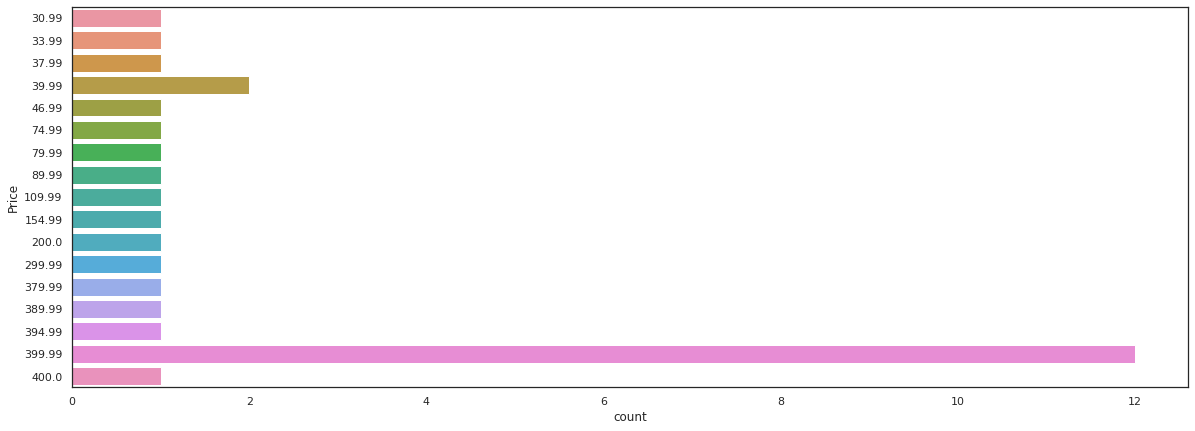

In [84]:
plt.figure(figsize=(20,7))                                             #Plotting a bar graph showing the number of installs vs Apps
sns.set_theme(style="white")
ax = sns.countplot(y='Price', data=ddf_Most_expensive)                 #Using Expen dataframe which we created while cleaning Price column
ddf.sort_values(by='Price',ascending=False).head(3)    


**i'm Rich - Trump Edition	 is the most expensive application with 10000 installs**

Q. Compute the total revenue earned from all the paid apps on the play store 

In [85]:
a = ddf['Installs'].to_numpy()
b = ddf['Price'].to_numpy()
print('Total sale amount from google play store is $',np.multiply(a,b).sum())

Total sale amount from google play store is $ 291115245.52


Total sale amount from google play store is $ 291,123,534.52

Q. Which App grossed the highest revenue 

In [86]:
ddf['Revenue']=ddf['Installs']*ddf['Price']
ddf.sort_values(by='Revenue',ascending=False).head()

App   Category  Rating  Reviews  Size  \
1835                      Minecraft     FAMILY     4.5  2375336   NaN   
6184                      I am rich  LIFESTYLE     3.8     3547   1.8   
6665              I Am Rich Premium    FINANCE     4.1     1867   4.7   
2702                  Hitman Sniper       GAME     4.6   408292  29.0   
9231  Grand Theft Auto: San Andreas       GAME     4.4   348962  26.0   

      Installs  Type   Price Content Rating                     Genres  \
1835  10000000  Paid    6.99   Everyone 10+  Arcade;Action & Adventure   
6184    100000  Paid  399.99       Everyone                  Lifestyle   
6665     50000  Paid  399.99       Everyone                    Finance   
2702  10000000  Paid    0.99     Mature 17+                     Action   
9231   1000000  Paid    6.99     Mature 17+                     Action   

     Last Updated Current Ver         Android Ver     Revenue  
1835   2018-07-24     1.5.2.1  Varies with device  69900000.0  
6184   2018-01-12         2.0               4.0.3  39999000.0  
6665   2017-11-12         1.6                 4.0  19999500.0  
2702   2018-07-12  1.7.110758                 4.1   9900000.0  
9231   2015-03-21        1.08                 3.0   6990000.0

Minecraft grossed the highest revenue i.e $ 69900000. Three of the top 5 highest grossing paid application are of Video Games catagory.  

Q. How much google earned from the 5,000,000+ installed apps

In [87]:

ddf[ddf.Installs>=5000000].sum()

App               Shoot Hunter-Gun KillerFun Kid Racing - Motocr...
Category          GAMEFAMILYFAMILYMAPS_AND_NAVIGATIONGAMEFAMILYS...
Rating                                                       8492.0
Reviews                                                  2036994178
Size                                                        43804.3
Installs                                                73495000000
Type              FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFr...
Price                                                          7.98
Content Rating    TeenEveryoneEveryoneEveryoneTeenEveryoneEveryo...
Genres            ActionRacing;Action & AdventureEntertainmentMa...
Current Ver       1.1.23.53Varies with device18.0.2Varies with d...
Android Ver       4.14.2Varies with device4.4Varies with deviceV...
Revenue                                                  79800000.0
dtype: object

We can see the Total revenue from apps with 5,000,0000+ installs is $79,800,000.0

### **2.Category**

Q. **Visualise Category distribution wrt. no of installs and infer the findings.** 

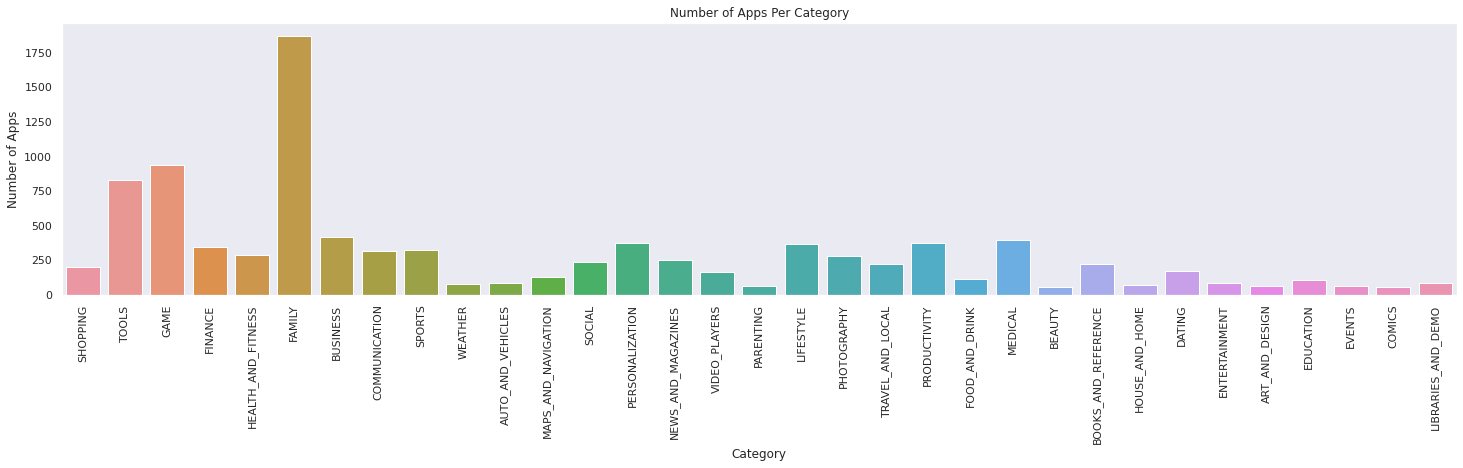

In [88]:
sns.set_style('dark')
plt.figure(figsize=(25, 5))
sns.countplot(x='Category', data=ddf)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

*We can visually observe that **Family, Games** and  **Tools** have the maximum number of downloads.*

Q. Correlate the Category data with Generes and infer the findings. 

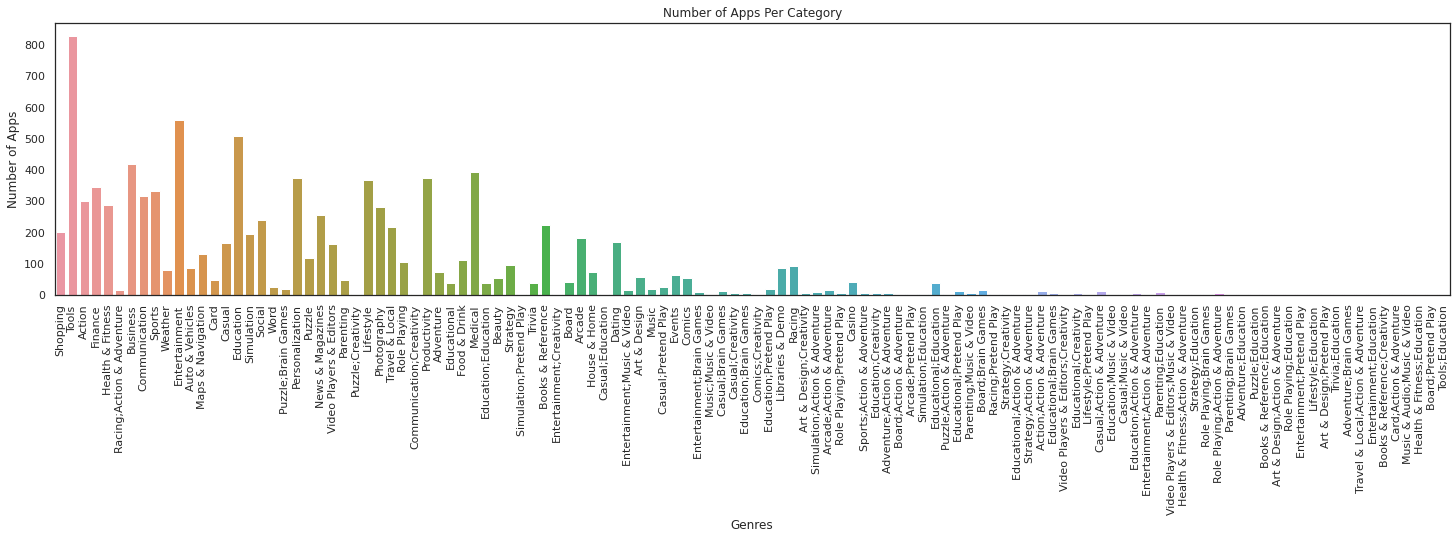

In [89]:
sns.set_style('white')
plt.figure(figsize=(25, 5))
sns.countplot(x='Genres', data=ddf)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

*We Observe that **Tools, Entertainment** & **Education** are the top performing apps*



**It will be safe to explore a correlation between entertainment apps for family as it might give us a usefull insight.**

In [90]:
ddf.loc[(ddf['Genres']=='Entertainment') & (ddf['Category']=='FAMILY')].sort_values(by='Installs',ascending=False).describe()

Rating       Reviews        Size      Installs       Price  \
count  480.000000  4.800000e+02  453.000000  4.800000e+02  480.000000   
mean     4.119167  8.226341e+04   14.053201  4.744072e+06    3.452292   
std      0.547386  4.931688e+05   17.810782  4.735310e+07   36.225854   
min      1.600000  0.000000e+00    0.000000  1.000000e+00    0.000000   
25%      3.900000  1.100000e+01    3.300000  1.000000e+03    0.000000   
50%      4.300000  1.635000e+02    7.000000  1.000000e+04    0.000000   
75%      4.400000  2.602500e+03   17.000000  1.000000e+05    0.000000   
max      5.000000  7.168735e+06   99.000000  1.000000e+09  399.990000   

            Revenue  
count  4.800000e+02  
mean   2.078252e+04  
std    2.703249e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    3.999900e+06

We observe that apps that are ment for entertainment {genre} with  family {category}  rank highly in the number of applications in the google store with a mean rating of 4.1, with mean reviews and installs higher than the 75% value of the respective catagory.

### **3.Content Rating**

Q. Visualise the rating distribution of the apps

Text(0.5, 1.0, 'Overall Rating of Apps')

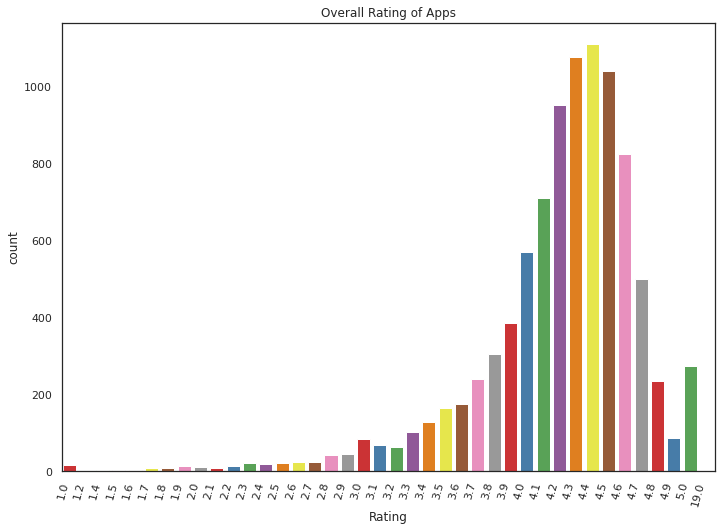

In [91]:
rating_distribution = sns.countplot(x="Rating" , data=df, palette = "Set1")
rating_distribution.set_xticklabels(rating_distribution.get_xticklabels(), rotation=75, ha="right")
plt.title("Overall Rating of Apps")

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

Q. .What is the distribution of App's wrt. content rating ?

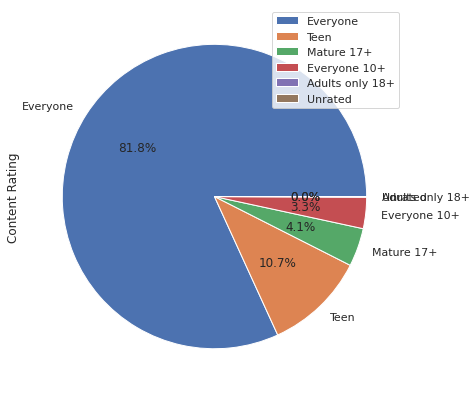

In [92]:
ddf['Content Rating'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%')
plt.legend()

From the above graph we can infer that 81.8% apps are rated for everyone, 10.7 for teens, 4.1% for late teenagers(17+), 3.3% for 10years and above. 

### **4. Application Rating**

Q. What are the 5 top rated apps.





In [93]:
ddf[ddf['Rating']==5].shape # We observe that there are 265 app with max rating 

(265, 14)

Q. We observe that there are 265 app with max rating, we will sort out analysis further by  number of intalls and number of reviews to get a better picture. 

In [94]:
ddf[ddf['Rating']==5].sort_values(by=['Installs','Reviews'],ascending=False ,ignore_index=True).head()

App   Category  Rating  \
0                          Ek Bander Ne Kholi Dukan     FAMILY     5.0   
1                                        Oración CX  LIFESTYLE     5.0   
2  Superheroes, Marvel, DC, Comics, TV, Movies News     COMICS     5.0   
3           CL Keyboard - Myanmar Keyboard (No Ads)      TOOLS     5.0   
4                                        Ríos de Fe  LIFESTYLE     5.0   

   Reviews  Size  Installs  Type  Price Content Rating         Genres  \
0       10   3.0     10000  Free    0.0       Everyone  Entertainment   
1      103   3.8      5000  Free    0.0       Everyone      Lifestyle   
2       34  12.0      5000  Free    0.0       Everyone         Comics   
3       24   3.2      5000  Free    0.0       Everyone          Tools   
4      141  15.0      1000  Free    0.0       Everyone      Lifestyle   

  Last Updated Current Ver Android Ver  Revenue  
0   2017-06-26       1.0.9         4.0      0.0  
1   2017-09-12      5.1.10         4.1      0.0  
2   2018-07-31       1.0.5         5.0      0.0  
3   2018-06-13       1.1.3         4.3      0.0  
4   2018-03-24         1.8         4.1      0.0

We can observe the among the highest rated free app, maximum installs are enjoyed by family {category} application. 

Q. Plot a graph between Ratings and Installs 

### **5.Application Reviews**

Q.Which are the Apps with the highest number of reviews?


In [95]:
highest_review=ddf.sort_values(by='Reviews',ascending=False ).head()
highest_review

App       Category  Rating  \
360                                   Facebook         SOCIAL     4.1   
391                         WhatsApp Messenger  COMMUNICATION     4.4   
1101                                 Instagram         SOCIAL     4.5   
869   Messenger – Text and Video Chat for Free  COMMUNICATION     4.0   
2531                            Clash of Clans         FAMILY     4.6   

       Reviews  Size    Installs  Type  Price Content Rating         Genres  \
360   78158306   NaN  1000000000  Free    0.0           Teen         Social   
391   69109672   NaN  1000000000  Free    0.0       Everyone  Communication   
1101  66509917   NaN  1000000000  Free    0.0           Teen         Social   
869   56642847   NaN  1000000000  Free    0.0       Everyone  Communication   
2531  44881447  98.0   100000000  Free    0.0   Everyone 10+       Strategy   

     Last Updated         Current Ver         Android Ver  Revenue  
360    2018-08-03  Varies with device  Varies with device      0.0  
391    2018-08-03  Varies with device  Varies with device      0.0  
1101   2018-07-31  Varies with device  Varies with device      0.0  
869    2018-08-01  Varies with device  Varies with device      0.0  
2531   2018-07-15           10.322.16                 4.1      0.0

Social media and Communication apps are the top 4 most reviewed applications, with facebbok holding the top spot. 

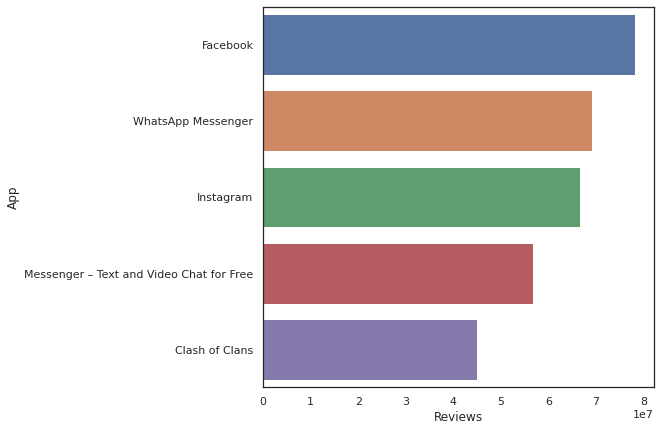

In [96]:
top_review_app=highest_review.sort_values("Reviews",ascending=False,ignore_index=True).head(20)
plt.figure(figsize=(7,7))
sns.barplot(x="Reviews",y="App",data=top_review_app);

Visual analysis tells us that facebook is the highest reviewed application.

### **6. Genre**

Q. Visualise  the Genre of apps with their price.

In [97]:
fig = px.box(ddf, x="Price", y="Genres", points="all")
fig.show(renderer="colab")

### **7.Type**

 Q. What is the ratio of Free app vs Paid app

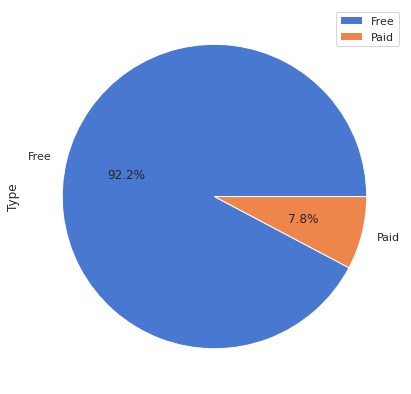

In [98]:
ddf['Type'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%',colors = sns.color_palette('muted'))
plt.legend()

Free vs Paid Apps Pie chart shows that around 92.2% of apps are free whereas only 7.8% are Paid

**Q. Find Realtion between Category of Application and Type**

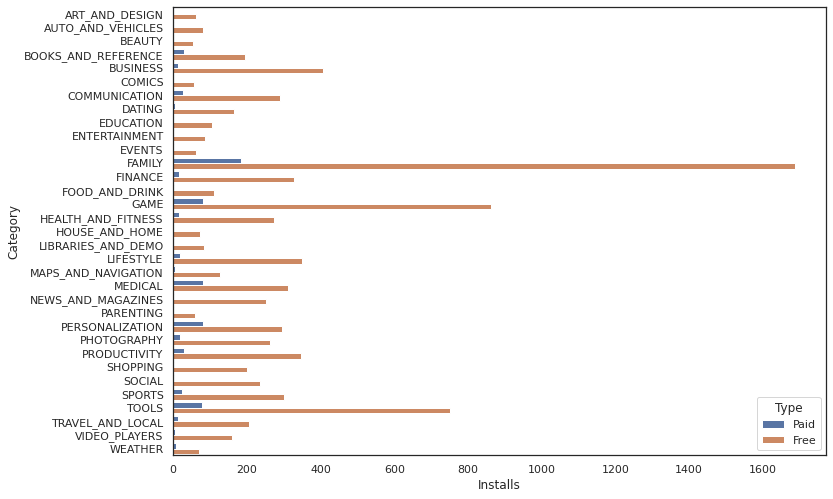

In [99]:
price = ddf.groupby(['Category','Type'],as_index=False)['Installs'].count()
price=price.sort_values(['Category','Installs'])
sns.barplot(y="Category",x="Installs",hue="Type",data=price)

**Family category has the most free and paid apps we also observe that social apps like entertainment, event, education, comic, and more are always free**

### **8. Installs**

**Q. Which app has highest number of installs, what is the count of apps in the said range?**

In [100]:
print(ddf['Installs'].max())


1000000000


In [101]:
#Sorting Installs Value

print(df[df['Installs']==1000000000].shape)
ddf.sort_values(by='Installs',ascending= False).head()

(0, 13)


App            Category  Rating  \
869   Messenger – Text and Video Chat for Free       COMMUNICATION     4.0   
941                                Google News  NEWS_AND_MAGAZINES     3.9   
1672                                   Google+              SOCIAL     4.2   
342              Skype - free IM & video calls       COMMUNICATION     4.1   
347                                     Google               TOOLS     4.4   

       Reviews  Size    Installs  Type  Price Content Rating  \
869   56642847   NaN  1000000000  Free    0.0       Everyone   
941     877635  13.0  1000000000  Free    0.0           Teen   
1672   4831125   NaN  1000000000  Free    0.0           Teen   
342   10484169   NaN  1000000000  Free    0.0       Everyone   
347    8033493   NaN  1000000000  Free    0.0       Everyone   

                Genres Last Updated         Current Ver         Android Ver  \
869      Communication   2018-08-01  Varies with device  Varies with device   
941   News & Magazines   2018-08-01               5.2.0                 4.4   
1672            Social   2018-07-26  Varies with device  Varies with device   
342      Communication   2018-08-03  Varies with device  Varies with device   
347              Tools   2018-08-03  Varies with device  Varies with device   

      Revenue  
869       0.0  
941       0.0  
1672      0.0  
342       0.0  
347       0.0

We observe that Google Play Books has the highest number of installs

**Q. Plot a graph showing relation between no of Installs and Reviews**

In [102]:

df = px.data.tips()
fig = px.scatter(
    ddf, x='Reviews', y='Installs', opacity=0.65,
    trendline='ols', trendline_color_override="red",width=700, height=400
)
fig.show(renderer="colab")

From the above regression plot we can see that Reviews and Installs are positively correlated means as the number of installs increases the number of reviews also increases

### **9.Last Updated**	

Q What could be the approximate date of creation of this dataset 

In [103]:
print('Date of application which was last updated:',ddf['Last Updated'].max())


Date of application which was last updated: 2018-08-08 00:00:00


The data set was created approximately around 2018-08-08. 

### **10. Android Ver**

 Q. How many apps that can work on android version 4.2

In [104]:
android_ver=ddf[ddf['Android Ver']=='4.2']
android_ver

App            Category  Rating  Reviews  \
4                    Fast Tract Diet  HEALTH_AND_FITNESS     4.4       35   
5         Fun Kid Racing - Motocross              FAMILY     4.1    59768   
12         CHOSEN - EV Smart Charger   AUTO_AND_VEHICLES     4.3        1   
39              Beauty and the Beast              FAMILY     4.4    70883   
40                     Scoreboard FR           LIFESTYLE     4.3        3   
...                              ...                 ...     ...      ...   
9214          The Lost Lands:DH Lite              FAMILY     4.3     1130   
9311                              el              FAMILY     4.3    32405   
9363  Moto LED for Moto X & E [Root]           LIFESTYLE     3.4     4082   
9369                       Jabbla BT               TOOLS     5.0        3   
9493                   [root] Pry-Fi               TOOLS     3.9     6736   

      Size  Installs  Type  Price Content Rating                     Genres  \
4      2.4      1000  Paid   7.99       Everyone           Health & Fitness   
5      NaN  10000000  Free   0.00       Everyone  Racing;Action & Adventure   
12    19.0        10  Free   0.00       Everyone            Auto & Vehicles   
39    31.0   1000000  Free   0.00       Everyone          Puzzle;Creativity   
40    15.0       100  Free   0.00       Everyone                  Lifestyle   
...    ...       ...   ...    ...            ...                        ...   
9214  48.0     50000  Free   0.00           Teen                 Simulation   
9311  47.0   1000000  Free   0.00       Everyone                     Casual   
9363   0.3    500000  Free   0.00       Everyone                  Lifestyle   
9369   0.1       100  Free   0.00       Everyone                      Tools   
9493   0.1    500000  Free   0.00       Everyone                      Tools   

     Last Updated Current Ver Android Ver  Revenue  
4      2018-08-08       1.9.3         4.2   7990.0  
5      2018-08-07        3.53         4.2      0.0  
12     2018-08-07       3.4.4         4.2      0.0  
39     2018-08-07       1.7.6         4.2      0.0  
40     2018-08-07         2.1         4.2      0.0  
...           ...         ...         ...      ...  
9214   2015-04-03        1.01         4.2      0.0  
9311   2014-12-18       1.2.1         4.2      0.0  
9363   2014-10-16         1.0         4.2      0.0  
9369   2014-10-06         1.0         4.2      0.0  
9493   2014-02-02        1.20         4.2      0.0  

[372 rows x 14 columns]

### **11. Size**

Q. Visualise Size vs No. of Apps plot and determine the Size bracket with maximum number of Apps. 

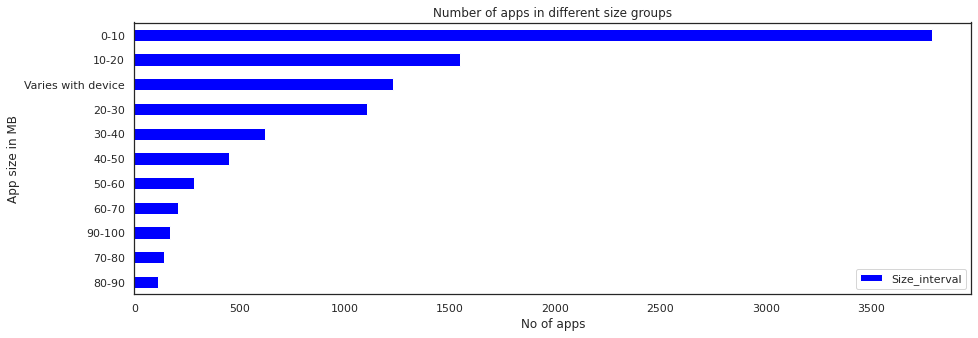

In [105]:
# We are creating a Size_df to plot a size interval and value graph. 
Size_df = ddf.Size.rename_axis('unique_values').reset_index(name='counts').sort_values(by='counts')
Size_df2 = Size_var.Size.rename_axis('unique_values').reset_index(name='counts').sort_values(by='counts')





#Dropping null values from the size 
Size_df.dropna(inplace =True)

# Creating a Size_interval column 
Size_df.loc[(Size_df['counts']>=0 ) & (Size_df['counts']<=10),'Size_interval' ] = '0-10'
Size_df.loc[(Size_df['counts']>=10) & (Size_df['counts']<=20),'Size_interval' ] = '10-20'
Size_df.loc[(Size_df['counts']>=20) & (Size_df['counts']<=30),'Size_interval' ] = '20-30'
Size_df.loc[(Size_df['counts']>=30) & (Size_df['counts']<=40),'Size_interval' ] = '30-40'
Size_df.loc[(Size_df['counts']>=40) & (Size_df['counts']<=50),'Size_interval' ] = '40-50'
Size_df.loc[(Size_df['counts']>=50) & (Size_df['counts']<=60),'Size_interval' ] = '50-60'
Size_df.loc[(Size_df['counts']>=60) & (Size_df['counts']<=70),'Size_interval' ] = '60-70'
Size_df.loc[(Size_df['counts']>=70) & (Size_df['counts']<=80),'Size_interval' ] = '70-80'
Size_df.loc[(Size_df['counts']>=80) & (Size_df['counts']<=90),'Size_interval' ] = '80-90'
Size_df.loc[(Size_df['counts']>=90) & (Size_df['counts']<=100),'Size_interval'] ='90-100'


#Creating a column for Size_interval for 'Varies with device' DataFrame
Size_df2['Size_interval']=Size_df2['counts']


# Appending the 'Varies with device' DataFrame
Size_df=Size_df.append(Size_df2).reset_index()

# PLotting a size interval graph


Size_df['Size_interval'].value_counts().plot.barh(figsize=(15,5), color='Blue').invert_yaxis()
plt.title("Number of apps in different size groups")
plt.xlabel('No of apps')
plt.ylabel('App size in MB')
plt.legend()

Majority of applications have a size between 0-10MB

### **12.Correlation**

 Q. Is there a correlation between rating, Reviews, Size with the price of the app

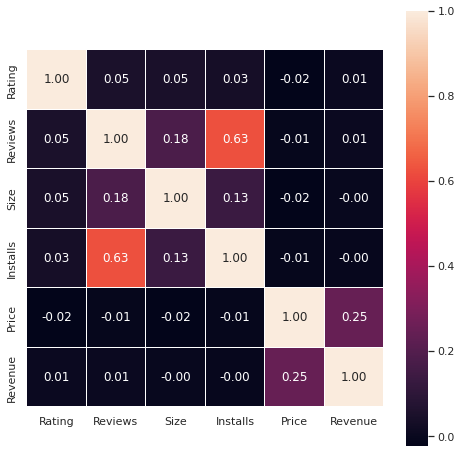

In [106]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(ddf.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

Looking at above chart we can infer that there are 92.2% free apps & only 7.8% paid apps on google playstore

### **13. Outliers**
Analyse box ploat discover key factors responsible for app engagement and success.

**Q Analyse box ploat for price**

In [107]:
x=['Price']#,'Installs','Size','Rating','Reviews']
fig = px.box(ddf, y=x,points="all",color="Type")
fig.show(renderer="colab")

Most expensive application of the Dataset is $$400, majority of paid applications lie between 0-$ 30 range.

**Q. Analyse box ploat for price**

In [108]:
x=['Installs']
fig = px.box(ddf, y=x,points="all",color="Type")
fig.show(renderer="colab")

Free application show very high number of installs and dawrfs paid application numbers.

Q. Analyse box ploat for Size

In [109]:
x=['Size']
fig = px.box(ddf, y=x,points="all",color="Type")
fig.show(renderer="colab")

**Q. Analyse box ploat for Rating**

In [110]:
x=['Rating']
fig = px.box(ddf, y=x,points="all",color="Type")
fig.show(renderer="colab")

Paid apps generally have high rating. 

**Q. Analyse box ploat for Reviews**

In [111]:
x=['Reviews']
fig = px.box(ddf, y=x,points="all",color="Type")
fig.show(renderer="colab")

***************


# **D. Play Store Sentiment Analysis**
### Description of App Dataset column

**Translated_Review :** *is the process of assessing translations after they've been completed to ensure quality, consistency, tone, and style*

**Sentiment :** *technique used to determine whether data is positive, negative or neutral. *

**Sentiment_Polarity :** *Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.*

**Sentiment_Subjectivit :**	*Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].*

In [112]:
#Reading the .csv file
#df_sentiment=pd.read_csv('/content/drive/MyDrive/datasets almabetter/User Reviews (1).csv')
df_sentiment=pd.read_csv('/content/drive/MyDrive/Datasets/GG/User Reviews.csv')

### **1. Overview of data** 

In [113]:
##Top five rows of the column 

df_sentiment.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [114]:
# Random 5 rows

df_sentiment.sample(5)

App  \
51899  GUNSHIP BATTLE: Helicopter 3D   
43171             Facetune - Ad Free   
27315                      ClassDojo   
44498               Farm Heroes Saga   
47934                   Food Network   

                                       Translated_Review Sentiment  \
51899             Why u asking access contact media open   Neutral   
43171  I looked trying find editor features luck. Whe...  Positive   
27315                                                NaN       NaN   
44498                                                NaN       NaN   
47934  Sometimes I feel well enough go downstairs I w...  Positive   

       Sentiment_Polarity  Sentiment_Subjectivity  
51899            0.000000                0.500000  
43171            0.270000                0.356667  
27315                 NaN                     NaN  
44498                 NaN                     NaN  
47934            0.488281                0.550000

In [115]:
#last five rows of the data

df_sentiment.tail()

App Translated_Review Sentiment  \
64290  Houzz Interior Design Ideas               NaN       NaN   
64291  Houzz Interior Design Ideas               NaN       NaN   
64292  Houzz Interior Design Ideas               NaN       NaN   
64293  Houzz Interior Design Ideas               NaN       NaN   
64294  Houzz Interior Design Ideas               NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN

In [116]:
#Rows and column of our data 

df_sentiment.shape

(64295, 5)

In [117]:
# Statistical overview

df_sentiment.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

# **E. Data Cleaning**

### **1.Duplicate values**

In [118]:
df_sentiment[df_sentiment['Translated_Review'].duplicated()]

App  \
7            10 Best Foods for You   
15           10 Best Foods for You   
78           10 Best Foods for You   
79           10 Best Foods for You   
100          10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
7                                                    NaN       NaN   
15                                                   NaN       NaN   
78                                                  Good  Positive   
79                                                  Good  Positive   
100    I like eat delicious food. That's I'm cooking ...  Positive   
...                                                  ...       ...   
64290                                                NaN       NaN   
64291                                                NaN       NaN   
64292                                                NaN       NaN   
64293                                                NaN       NaN   
64294                                                NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
7                     NaN                     NaN  
15                    NaN                     NaN  
78                    0.7                0.600000  
79                    0.7                0.600000  
100                   1.0                0.533333  
...                   ...                     ...  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  

[36300 rows x 5 columns]

In [119]:
#Dropping duplicate values

before = len(df_sentiment.index)                                                                            #Length of original Dataframe 
print('Total entries with duplicates were '+ (str(before)))
df_sentiment.drop_duplicates( keep='first', inplace=True, ignore_index=True)   #Drop duplicates with a value in a specific column.
after = len(df_sentiment.index)                                                                             #Length of duplicated Dataframe 
print('Total entries after duplicates were dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')

Total entries with duplicates were 64295
Total entries after duplicates were dropped are 30679
Total 33616 entries were dropped.


In [120]:
df_sentiment.shape

(30679, 5)

### **2.Null values**

In [121]:
#Checking the null values 
df_sentiment[df_sentiment['Sentiment'].isnull()].sample(10)

App Translated_Review Sentiment  \
214    1LINE – One Line with One Touch               NaN       NaN   
18911       English to Urdu Dictionary               NaN       NaN   
4447                 Apple Daily 蘋果動新聞               NaN       NaN   
12524        Choices: Stories You Play               NaN       NaN   
16107                      Device Help               NaN       NaN   
10178                    C++ Tutorials               NaN       NaN   
3591       Anatomy Learning - 3D Atlas               NaN       NaN   
2335                    Age Calculator               NaN       NaN   
9437       Brightest Flashlight Free ®               NaN       NaN   
18153                             ESPN               NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
214                   NaN                     NaN  
18911                 NaN                     NaN  
4447                  NaN                     NaN  
12524                 NaN                     NaN  
16107                 NaN                     NaN  
10178                 NaN                     NaN  
3591                  NaN                     NaN  
2335                  NaN                     NaN  
9437                  NaN                     NaN  
18153                 NaN                     NaN

Since null values range accross entire rows. we can confidently drop them 

In [122]:
# Dropping the null values

before = len(df_sentiment.index)                                                 #Length of original Dataframe 
print('Total entries with null values were '+ (str(before)))
df_sentiment.dropna(inplace=True)                                                #Drop duplicates with a value in a specific column.
after = len(df_sentiment.index)                                                  #Length of null values Dataframe 
print('Total entries after null values dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')


Total entries with null values were 30679
Total entries after null values dropped are 29692
Total 987 entries were dropped.


#**F. Exploratory Data Analysis**

### **1. Sentiment and Sentiment Subjectivity**

In [123]:
import plotly.graph_objects as go

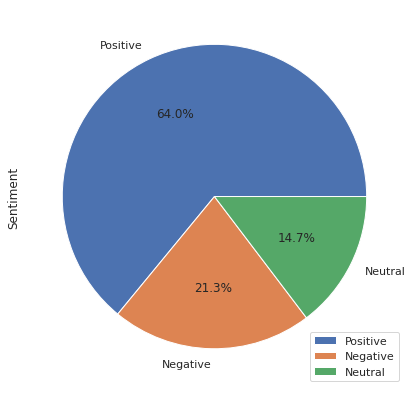

In [124]:
# Plotting a scattergraph 

from pandas._libs.hashtable import value_count
import plotly.graph_objects as go

import plotly.express as px


fig = px.scatter(df_sentiment, x="Sentiment_Polarity", y="Sentiment_Subjectivity", color="Sentiment",
                 size='Sentiment_Subjectivity', hover_data=['App'])
fig.show(renderer="colab")

# Plotting a Pie chart for distribution visualisation 

df_sentiment['Sentiment'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%')
plt.legend()


64% of people have positive, 21.3% negative and 14.7% have neutral  sentiment

In [125]:
positive_reviews=df_sentiment[df_sentiment['Sentiment']=='Positive']
positive_reviews.shape

(19015, 5)

Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

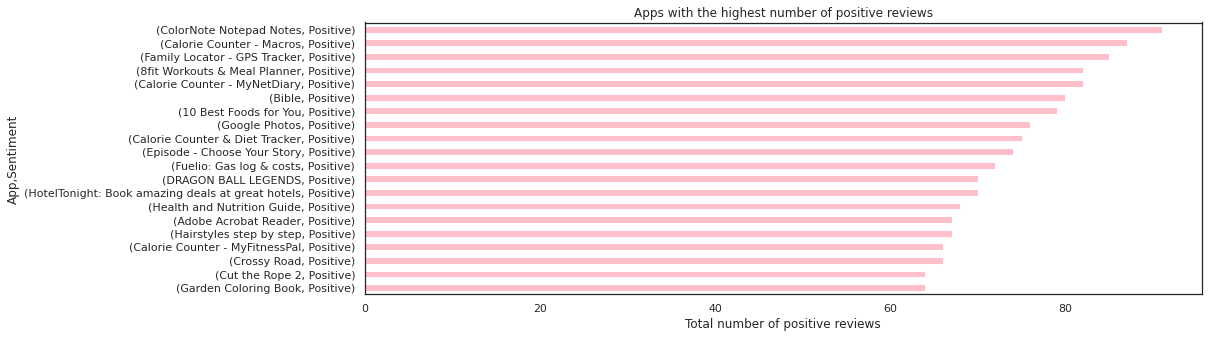

In [126]:
positive_reviews.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='pink').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

### **2.Sentiment Polarity**

In [127]:
df_sentiment['Sentiment_Polarity'].max()

1.0

In [128]:
highest_sp=df_sentiment[df_sentiment['Sentiment_Polarity']>=0.7]

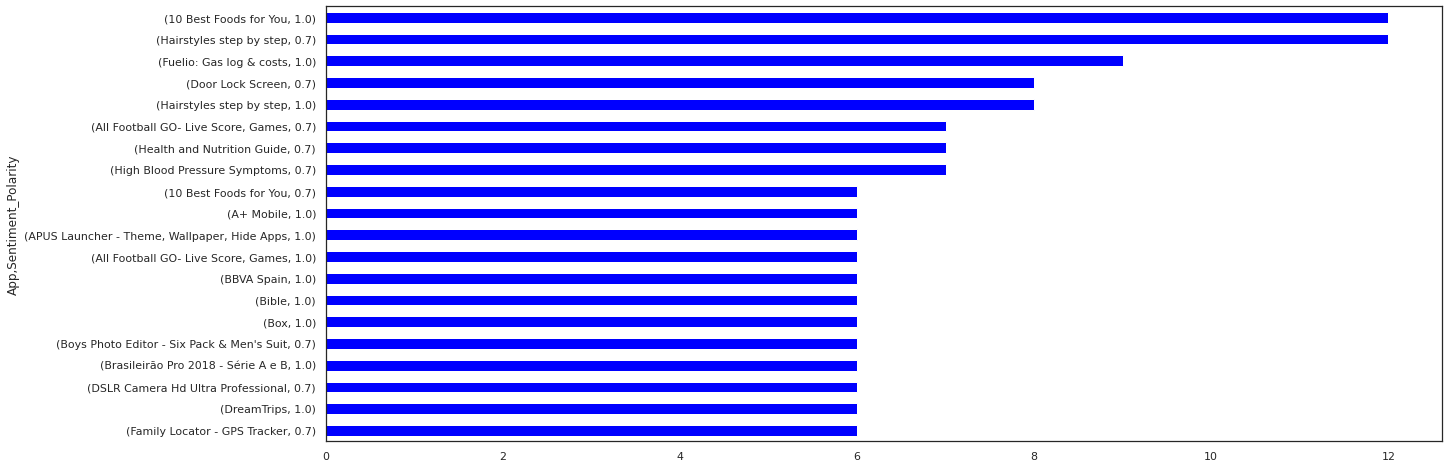

In [129]:
highest_sp.groupby('App')['Sentiment_Polarity'].value_counts().nlargest(20).plot.barh(figsize=(20,8), color='blue').invert_yaxis()

In [130]:
minimum_sp=df_sentiment[df_sentiment['Sentiment_Polarity']==0 ]

In [131]:
minimum_sp.head()

App                      Translated_Review Sentiment  \
7   10 Best Foods for You                   Looking forward app,   Neutral   
8   10 Best Foods for You  It helpful site ! It help foods get !   Neutral   
20  10 Best Foods for You                             God health   Neutral   
23  10 Best Foods for You      I found lot wealth form health...   Neutral   
27  10 Best Foods for You                            On test....   Neutral   

    Sentiment_Polarity  Sentiment_Subjectivity  
7                  0.0                     0.0  
8                  0.0                     0.0  
20                 0.0                     0.0  
23                 0.0                     0.0  
27                 0.0                     0.0

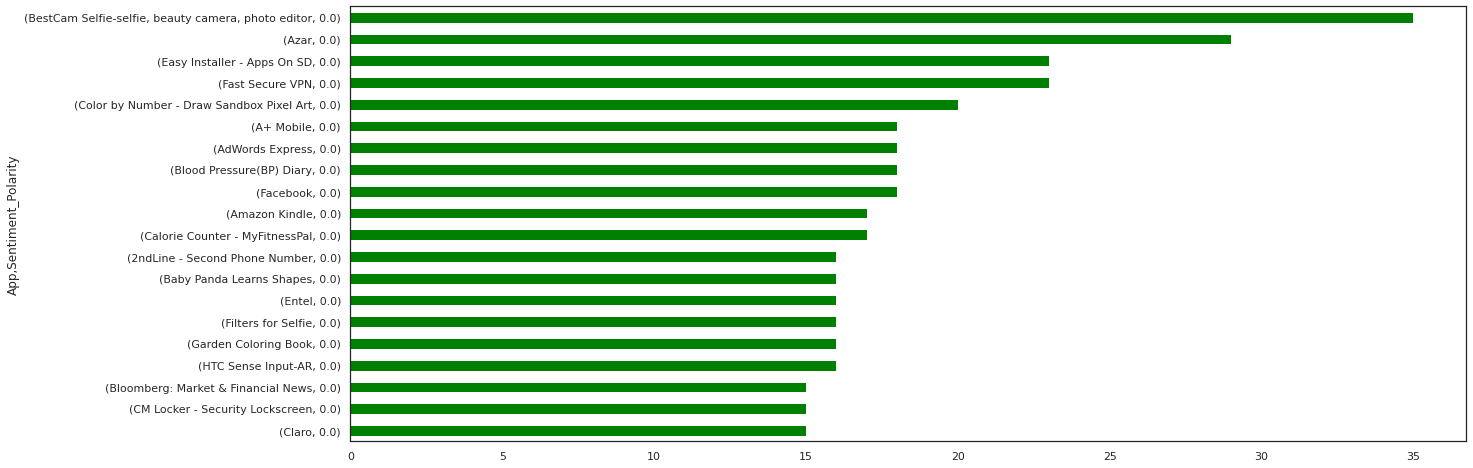

In [132]:
minimum_sp.groupby('App')['Sentiment_Polarity'].value_counts().nlargest(20).plot.barh(figsize=(20,8), color='green').invert_yaxis()

### **3.Translated_Review**

In [133]:
from wordcloud import WordCloud, STOPWORDS

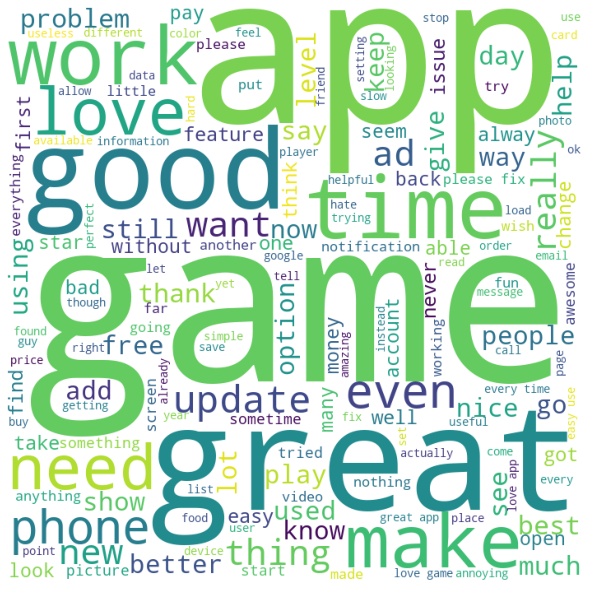

In [134]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_sentiment.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Words sucha as 'game', 'app','work', 'time', 'good', 'phone' ,'make', 'love' and various others are used very often 

# **G. Combined analysis** 

In [135]:
# Combining the two Datasets by using merge command.

df_combine=pd.merge(ddf,df_sentiment,on ='App')

#Looking at 5 random values from the data set. 
 
df_combine.sample(5)

App        Category  Rating  \
22514                    Educational Games 4 Kids          FAMILY     4.3   
20942                         All Social Networks          SOCIAL     4.2   
5821                  Episode - Choose Your Story            GAME     4.3   
18735  Gay Sugar Daddy Dating & Hookup – Sudy Gay          DATING     4.1   
23255                             DIY On A Budget  HOUSE_AND_HOME     4.7   

       Reviews  Size  Installs  Type  Price Content Rating  \
22514    11618  39.0   5000000  Free    0.0       Everyone   
20942    22492   1.5   1000000  Free    0.0       Everyone   
5821   1841061   NaN  50000000  Free    0.0           Teen   
18735     2212  41.0    100000  Free    0.0     Mature 17+   
23255      114   8.3     10000  Free    0.0           Teen   

                      Genres Last Updated         Current Ver  \
22514  Educational;Education   2018-04-03                 2.4   
20942                 Social   2018-05-21              2.4.12   
5821              Simulation   2018-07-31  Varies with device   
18735                 Dating   2018-06-20               2.0.5   
23255           House & Home   2018-02-18                 2.1   

              Android Ver  Revenue  \
22514                 4.1      0.0   
20942                 4.0      0.0   
5821   Varies with device      0.0   
18735               4.0.3      0.0   
23255                 4.1      0.0   

                                       Translated_Review Sentiment  \
22514                                   It's bad lot Ads  Negative   
20942  Its good made pay 8$ get Snapchat I pay every ...  Positive   
5821   My stories load, even loading completes story ...  Negative   
18735                                         nice loved  Positive   
23255  Useless app, alot people sharing questions hal...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
22514           -0.700000                0.666667  
20942            0.700000                0.600000  
5821            -0.250000                0.700000  
18735            0.650000                0.900000  
23255           -0.222222                0.155556

Q. Visualise the sentiment distribution for various Category of Apps. 

Text(0, 0.5, '')

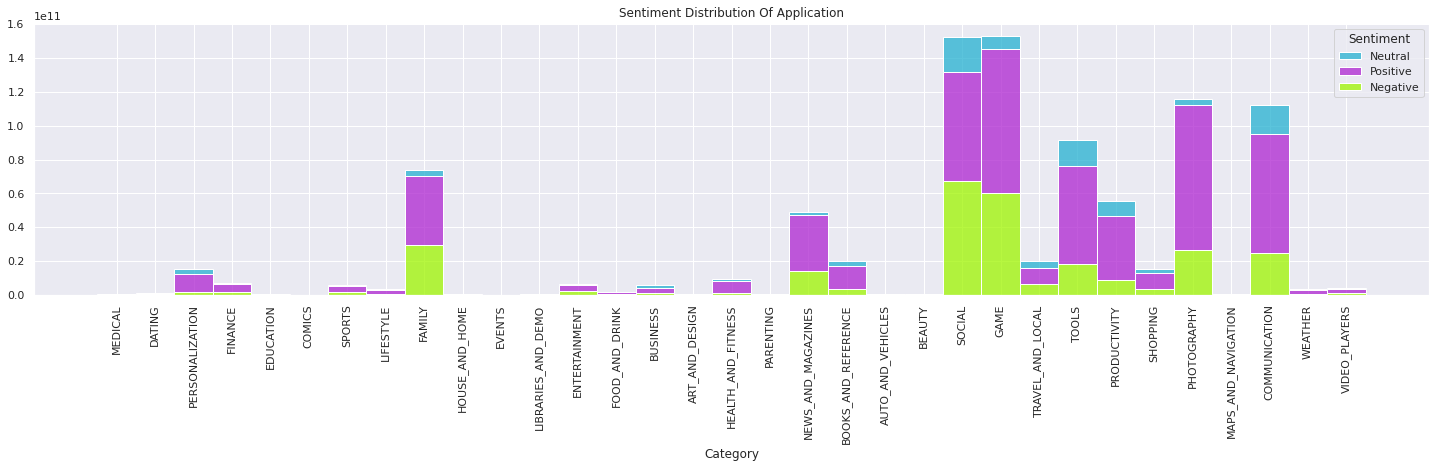

In [136]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(25, 5))
sns.set( style = "darkgrid" ),  

ax = sns.histplot(
    #sns.set( style = "dark" ),  
    df_combine.sort_values(by='Installs'),                    # 'Sentiment','Installs','Genres'
    x='Category',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='Installs',
    hue='Sentiment',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1','#9ff500'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    #shrink=0.8
    
)
plt.xticks(rotation=90)

ax.set_title('Sentiment Distribution Of Application')
# Remove 'Count' ylabel.
ax.set_ylabel(None)

Q How does Sentiment Subjectivity effect the user reviews ?

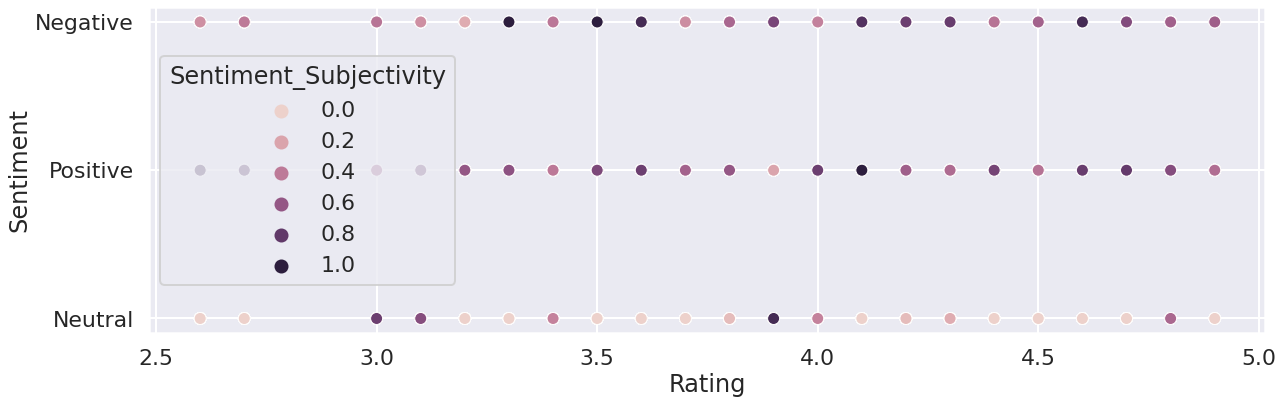

In [137]:
sns.set_context("poster")
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_combine, x="Rating", y="Sentiment", hue="Sentiment_Subjectivity") #Rating Sentiment Sentiment_Polarity Sentiment_Subjectivity




1.   When the sentiment is negative,  ratings are low the subjectivity observed is on the lower side  

   *   Users who disliked the application. 
   

2.   When the sentiment is negativt, ratings are high the subjectivity observed is high.

     *   Might be an indicator of users who are loyal, but want drastic improvements in the application 
     *   Might be an indicator of users who give high rating to highlight their negative experience with the application 

3. When the sentiment is positive, ratings are low the subjectivity observed is high  

    *   Might be an indicator of users who are loyal, but want drastic improvements in the application  
    

4. When the sentiment is positive, ratings are high the subjectivity observed is on the higher side.   

  *   Might be an indicator of users adding suggestions for application         improvement.  












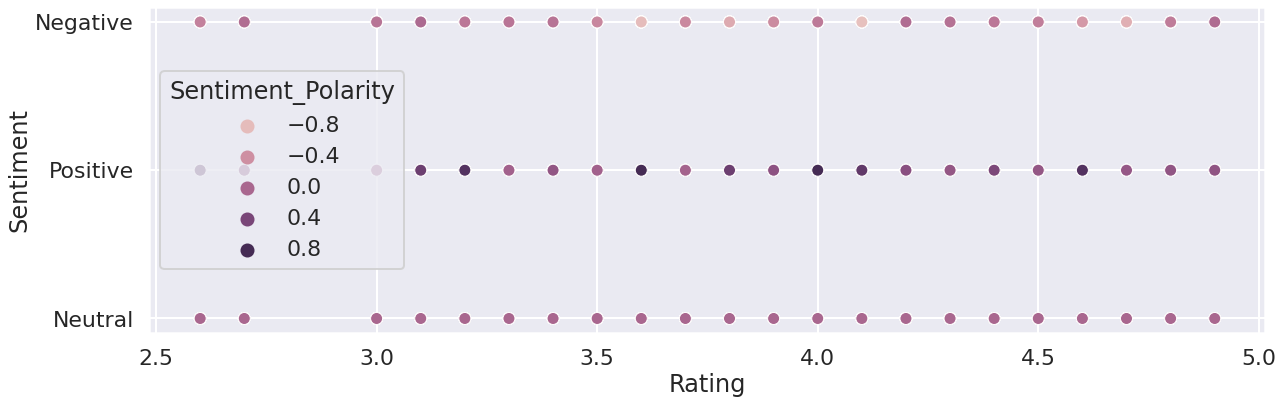

In [138]:
sns.set_context("poster")
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_combine, x="Rating", y="Sentiment", hue="Sentiment_Polarity") #Rating Sentiment Sentiment_Polarity Sentiment_Subjectivity


1.   When the polarity towards and application is negative and ratings are low the polarity observed is on the higher negative side     

2.   When the polarity towards and application is negative and ratings are high the polarity observed is on the lower negative side .


3. When the polarity towards and application is positive and ratings are low the polarity observed is on the higher positve side.    
    

4. When the polarity towards and application is positive and ratings are high the polarity observed is observed on the higher positve side .   




# **H. Analysis Summary** 


*   i'm Rich - Trump Edition is the most expensive application with 10000 installs.
*   Total sale amount from google play store is $ 291,123,534.52.
*   Family, Games and Tools have the maximum number of downloads.
*   Tools, Entertainment & Education are the top performing apps

*   Entertainment Apps {genre} with family {category} rank highly in the number of applications in the google store with a mean rating of 4.1, with mean reviews and installs higher than the 75% value of the respective catagory.
*   Most of the apps in the Play Store have a rating between 4 and 4.7.
*   81.8% apps are rated for everyone, 10.7 for teens, 4.1% for late teenagers(17+), 3.3% for 10years and above.
*   Among the highest rated free app, maximum installs are enjoyed by family {category} application.
*   64% of people have positive, 21.3% negative and 14.7% have neutral  sentiment
*   Words sucha as 'game', 'app','work', 'time', 'good', 'phone' ,'make', 'love' and various others are used very often 
*  Social media and Communication apps are the top 4 most reviewed applications, with facebook holding the top spot.
*  92.2% of apps are free whereas only 7.8% are Paid
*   Family category has the most free and paid apps, we also observe that social apps like entertainment, event, education, comic, and more are always free
*   We observe that Google Play Books has the highest number of installs

*   Majority of paid applications lie between 0-$ 30 range.



# **I. key factors responsible for app engagement and success**



*   Apps that are rated for family and are of the games catagory perfore well. 
*   Best price range for  of an application is between 0-30$. 
*   Facebook dominate social media application Install, with it Subsidaries it holds the top 4 out of 5 spots 
*   Apps which are initially free to download see more downloads, its better to keep in-app purchases than have an upfront cost to download.





# **J. logical inconsistency**

The data was checked for logical inconsistency as follows.

1.   Ratings.

The ratings where checked to be between 1-5, one outlier was observed, it was observed that this outlier had shifted values, hence unambiguity in data. The data in the row was rearranged. 

2.   Reviews Vs. Installs

It is quite obvious that reviews of an application cannot be more than the no of downloads, Hence any data which showed such inconsistency is removed. 

3. Removal of duplicate values 
Before removal we arranged the data by last date, and keeping the last update of the duplicate values 
